# Exploration of Customer Segmentation Dataset
This shows the EDA performed on the customer segmentation dataset to find the relationships between the features
The dataset ca be found on kaggle at : https://www.kaggle.com/datasets/ahmedmohameddawoud/bank-customers-segmentation

<h4>About Dataset</h4>

bank client data:
- 1. ``age (numeric) ``
- 2. ``job`` : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3. ``marital`` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4. ``education`` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5. ``default``: has credit in default? (categorical: 'no','yes','unknown')
- 6. `` housing``: has housing loan? (categorical: 'no','yes','unknown')
- 7. ``loan``: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:
- 8. ``contact``: contact communication type (categorical: 'cellular','telephone')
- 9. ``month``: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
- 10. ``day_of_week``: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11. ``duration``: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:
- 12. ``campaign``: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13. ``pdays``: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14. ``previous``: number of contacts performed before this campaign and for this client (numeric)
- 15. ``poutcome``: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes
- 16. ``emp.var.rate``: employment variation rate - quarterly indicator (numeric)
- 17. ``cons.price.idx``: consumer price index - monthly indicator (numeric)
- 18. ``cons.conf.idx``: consumer confidence index - monthly indicator (numeric)
- 19. ``euribor3m``: euribor 3 month rate - daily indicator (numeric)
- 20. ``nr.employed``: number of employees - quarterly indicator (numeric)
- 21. ``subscribed`` - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler #scaler
from sklearn.cluster import KMeans #k-means
from sklearn.decomposition import PCA #pca
import plotly.express as px
import plotly.graph_objects as go
import pickle


ModuleNotFoundError: No module named 'plotly'

In [ ]:
# Load data into dataframe
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Assess

In [ ]:
df.duplicated().sum()

12

In [ ]:
df[df.duplicated(keep = False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


#### Clean

In [ ]:
# drop duplicates
df.drop_duplicates(inplace = True)

#### Test

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Exploratory Data Analysis
> In this section, our initial step towards the exploratory phase is to review each feature and analyze the relationships between them in order to gain a better understanding of the dataset.

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

#### Age

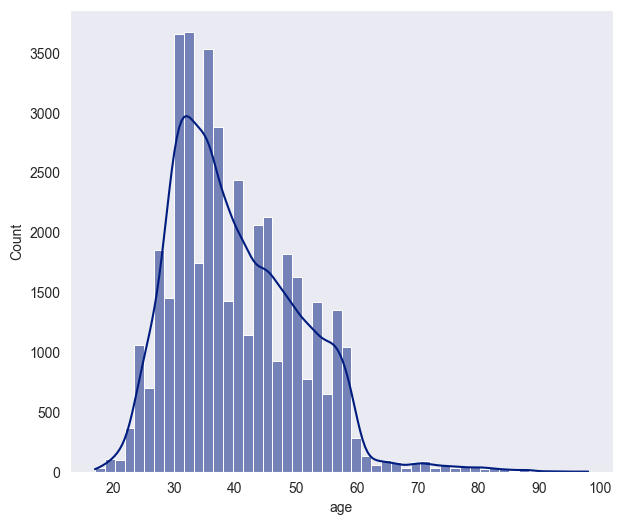

In [ ]:
plt.figure(figsize = (7,6))
sns.set_style('dark')
sns.set_palette('dark')
sns.histplot(data = df, x = 'age', bins = 50, kde = True);

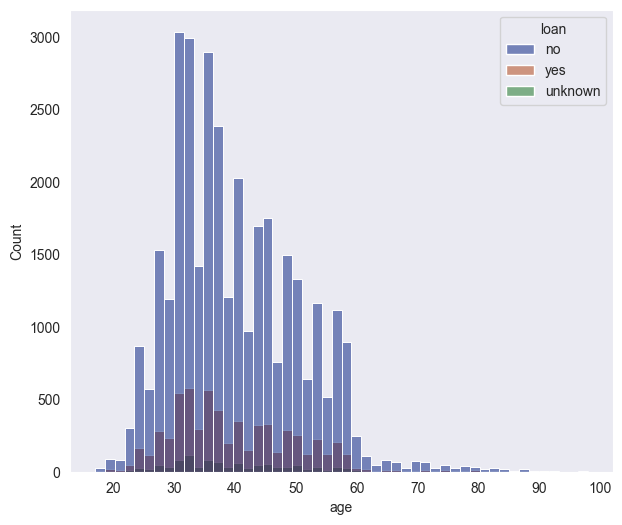

In [ ]:
plt.figure(figsize = (7,6))
sns.histplot(data = df, x = 'age',hue = 'loan', bins = 50);

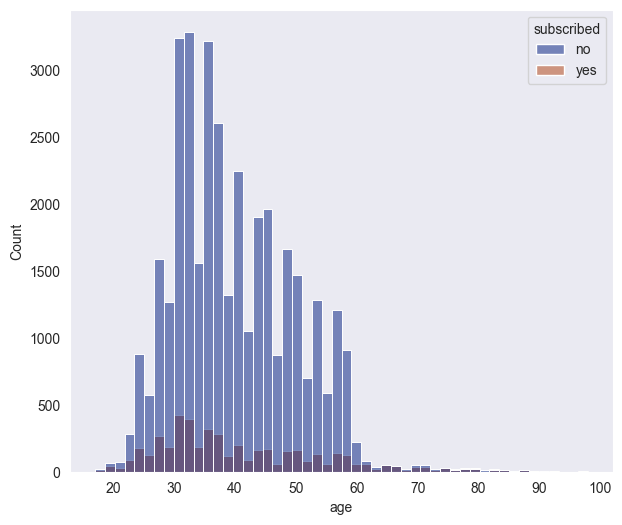

In [ ]:
plt.figure(figsize = (7,6))
sns.histplot(data = df, x = 'age', hue = 'subscribed', bins = 50);

> It is observed that most people from 20-60 do not have loans and did not subscribe for term deposit.

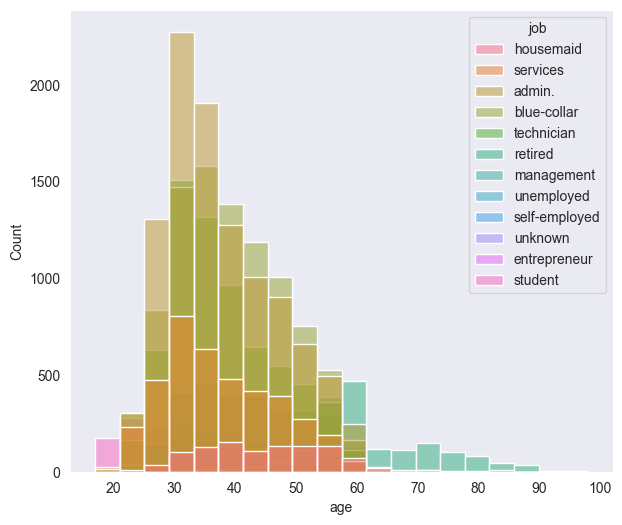

In [ ]:
plt.figure(figsize = (7,6))
sns.histplot(data = df, x = 'age',hue = 'job', bins = 20);

> It is observed that most people of ages 30-50 have admin related jobs.   

#### Job

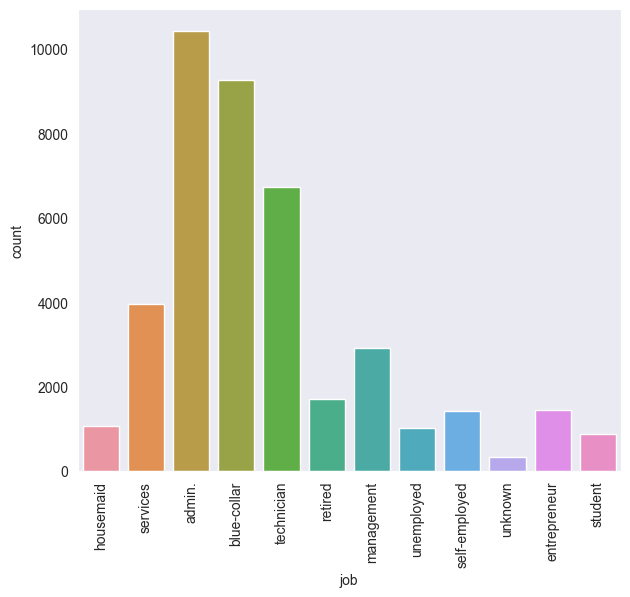

In [ ]:
plt.figure(figsize = (7,6))
sns.countplot(data = df, x = 'job')
plt.xticks(rotation = 90);

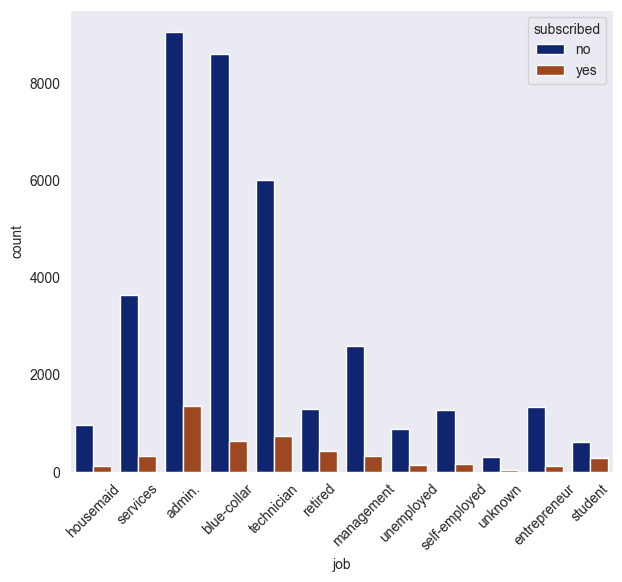

In [ ]:
plt.figure(figsize = (7,6))
sns.countplot(data = df, x = 'job', hue = 'subscribed')
plt.xticks(rotation = 45);

> The most prevalent occupation among customers is administration, with the highest number of term deposit subscribers. However, despite this, the majority of individuals with this occupation and pther occupations do not subscribe to the term deposit.

#### Education

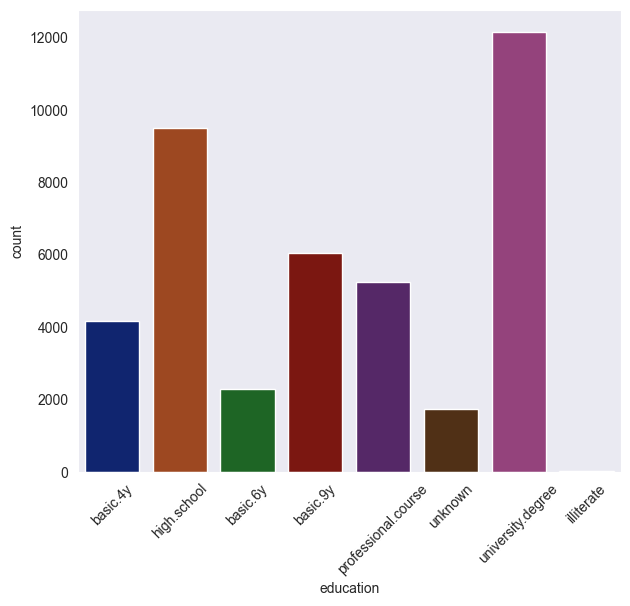

In [ ]:
plt.figure(figsize = (7,6))
sns.countplot(data = df, x = 'education')
plt.xticks(rotation = 45);

> University degree is the most predominant.

#### Default

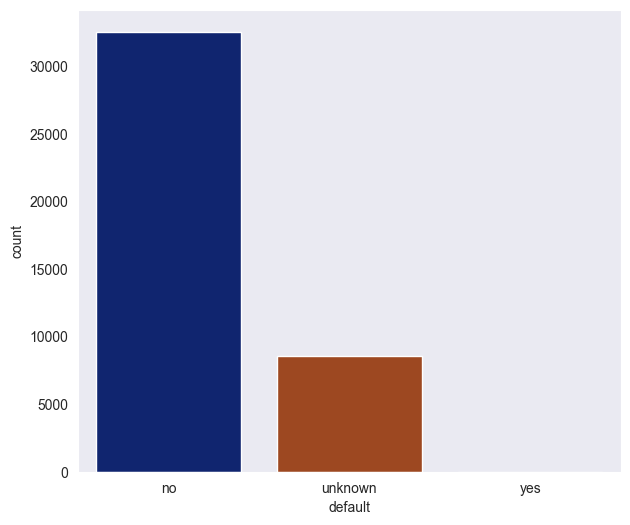

In [ ]:
plt.figure(figsize = (7,6))
sns.countplot(data = df, x = 'default');

> No customer has a default on their loan.

#### Housing

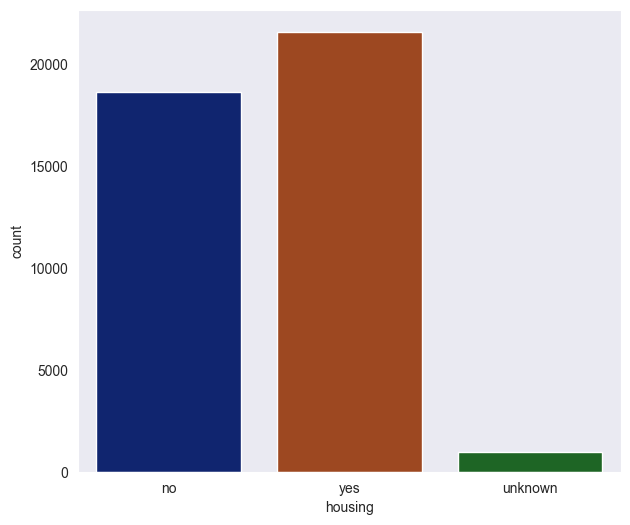

In [ ]:
plt.figure(figsize = (7,6))
sns.countplot(data = df, x = 'housing');

> Majority of customers have housing loans.

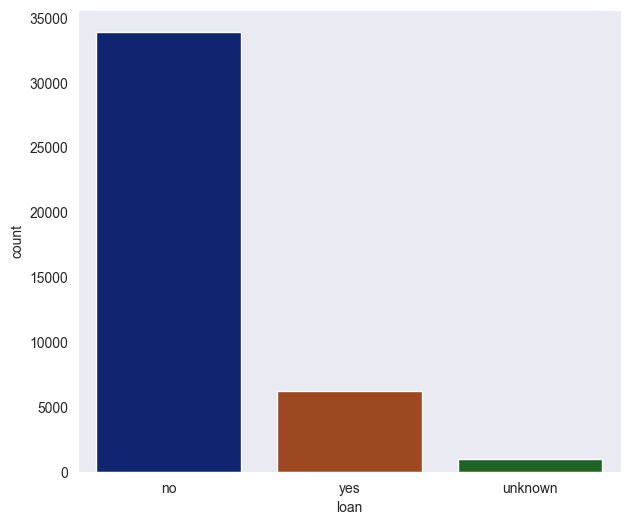

In [ ]:
plt.figure(figsize = (7,6))
sns.countplot(data = df, x = 'loan');

> Most customers don't have personal loans.

#### Duration

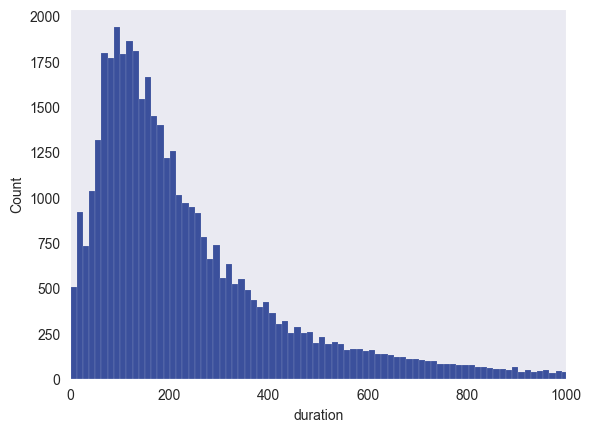

In [ ]:
sns.histplot(data = df, x = 'duration')
plt.xlim(0,1000);

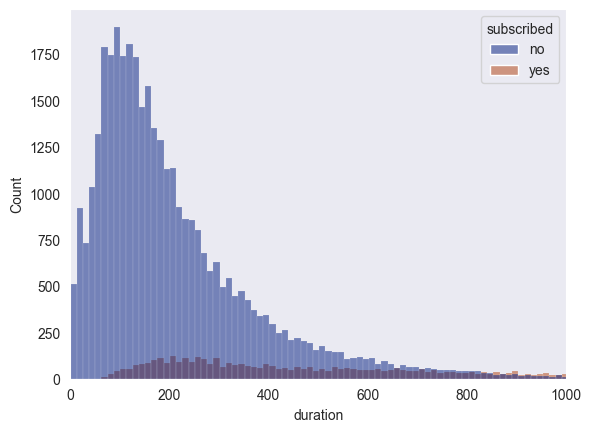

In [ ]:
sns.histplot(data = df, x = 'duration', hue = 'subscribed')
plt.xlim(0,1000);

This shows that duration length does not have an impact on customer subscription.

<Figure size 700x600 with 0 Axes>

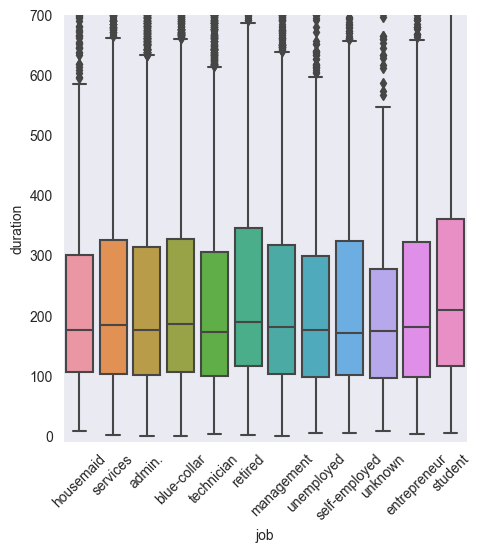

In [ ]:
plt.figure(figsize = (7,6))
sns.catplot(data = df, x = 'job', y = 'duration', kind = 'box')
plt.xticks(rotation = 45)
plt.ylim(-10,700);

> The call duration to most customers are close. 

#### Pdays
> Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

<AxesSubplot: xlabel='pdays', ylabel='Count'>

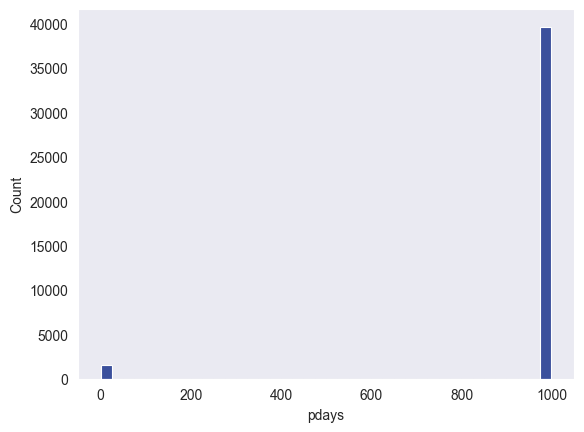

In [ ]:
sns.histplot(data = df, x = 'pdays', bins = 40)

> It is observed that most customers have never been contacted before. However, let us look into the customers that have been contacted before.

<AxesSubplot: xlabel='pdays', ylabel='Count'>

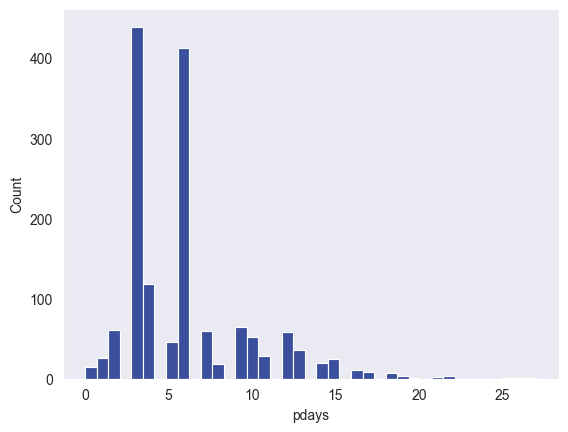

In [ ]:
data = df[df.pdays != 999]
sns.histplot(data = data, x = 'pdays')

<AxesSubplot: xlabel='pdays', ylabel='Count'>

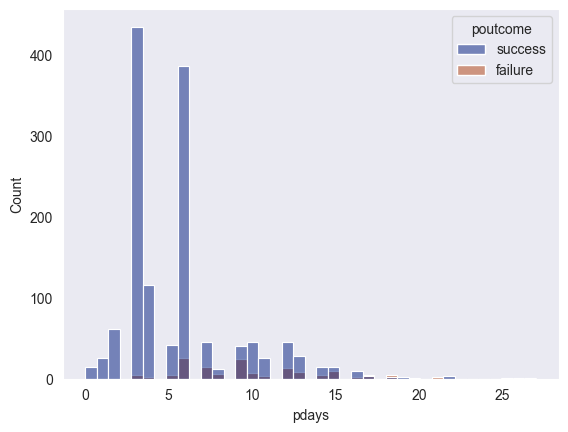

In [ ]:
sns.histplot(data = data, x = 'pdays', hue = 'poutcome')

<AxesSubplot: xlabel='pdays', ylabel='Count'>

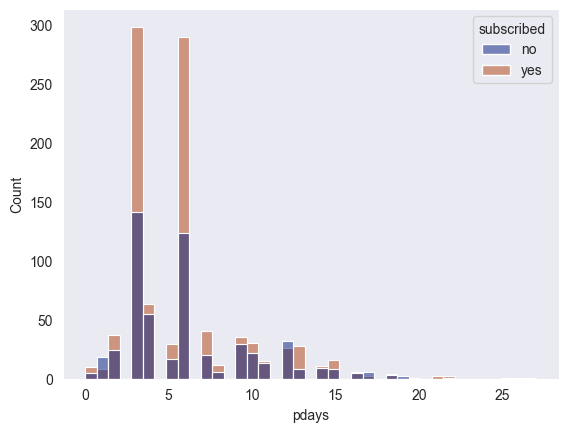

In [ ]:
sns.histplot(data = data, x = 'pdays', hue = 'subscribed')

<h4>Observation</h4> From the above plots, we can conclude that having lesser days between contact increases the chances of term deposit subscription success. 

#### Previous
> Number of contacts performed before this campaign and for this client (numeric)

<AxesSubplot: xlabel='previous', ylabel='Count'>

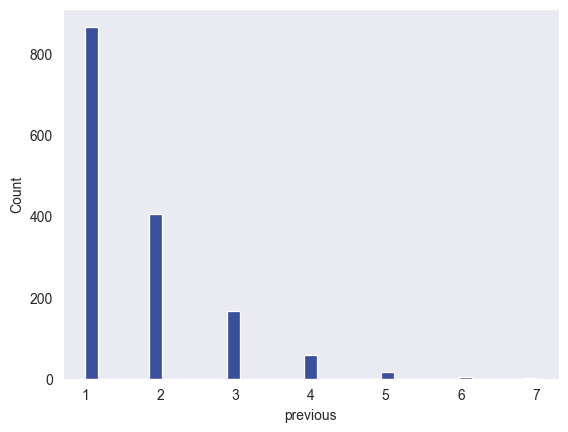

In [ ]:
sns.histplot(data = data, x = 'previous')

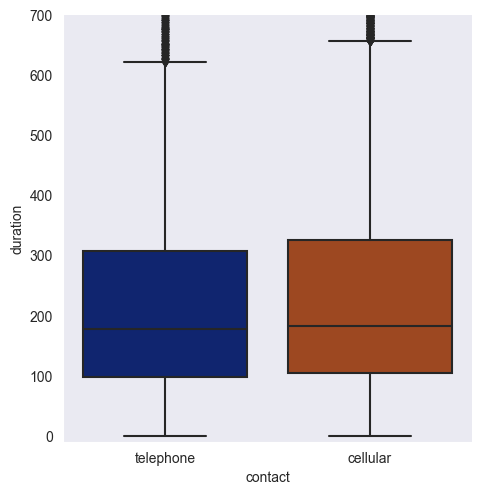

In [ ]:
sns.catplot(data = df, x = 'contact', y = 'duration', kind = 'box')
plt.ylim(-10, 700);

> The duration of the call is nearly identical, regardless of whether it's made on a cellphone or a landline.

# Clustering using K Means model 
### Data preparation
#### Dropping off the features that would not neccessary help us in the segmentation
#### Converting all categorical features into dummies in order for the kmeans model to perform properly.

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [ ]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
# categorized the jobs
df['job'] = df['job'].replace(['housemaid','unemployed','unknown','student'],'tier1')
df['job']= df['job'].replace(['services','technician','retired'],'tier2')
df['job']=df['job'].replace(['admin.','blue-collar','management','self-employed','entrepreneur'],'tier3')

In [ ]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
df['education']=df['education'].replace(['illiterate','basic.4y', 'high.school', 'basic.6y', 'basic.9y','unknown'],'non-educated')
df['education']=df['education'].replace(['university.degree','professional.course'],'educated')

In [ ]:
df.shape

(41176, 21)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,tier1,married,non-educated,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,tier2,married,non-educated,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,tier2,married,non-educated,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,tier3,married,non-educated,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,tier2,married,non-educated,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### drop off 

In [ ]:
df.drop(columns=['cons.price.idx','month','nr.employed','euribor3m','cons.conf.idx','emp.var.rate','cons.conf.idx','pdays','duration','day_of_week','contact'],axis=1,inplace=True)

In [ ]:
df.shape

(41176, 11)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,campaign,previous,poutcome,subscribed
0,56,tier1,married,non-educated,no,no,no,1,0,nonexistent,no
1,57,tier2,married,non-educated,unknown,no,no,1,0,nonexistent,no
2,37,tier2,married,non-educated,no,yes,no,1,0,nonexistent,no
3,40,tier3,married,non-educated,no,no,no,1,0,nonexistent,no
4,56,tier2,married,non-educated,no,no,yes,1,0,nonexistent,no


In [ ]:
df['default'].is_unique

False

In [ ]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
## feature engineering
df['housing']=df['housing'].map({'no':0,'yes':1})
df['loan']=df['loan'].map({'no':0,'yes':1})
df['subscribed']=df['subscribed'].map({'no':0,'yes':1})
#df['default']=df['default'].map({'no':0,'yes':1,'subscribed':0})

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,campaign,previous,poutcome,subscribed
0,56,tier1,married,non-educated,no,0.0,0.0,1,0,nonexistent,0
1,57,tier2,married,non-educated,unknown,0.0,0.0,1,0,nonexistent,0
2,37,tier2,married,non-educated,no,1.0,0.0,1,0,nonexistent,0
3,40,tier3,married,non-educated,no,0.0,0.0,1,0,nonexistent,0
4,56,tier2,married,non-educated,no,0.0,1.0,1,0,nonexistent,0


In [ ]:
x= pd.get_dummies(df,columns=['job','education','marital','default','poutcome'], drop_first=False)

In [ ]:
x.head()

,age,housing,loan,campaign,previous,subscribed,job_tier1,job_tier2,job_tier3,education_educated,...,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0.0,0.0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,57,0.0,0.0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,37,1.0,0.0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,40,0.0,0.0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,56,0.0,1.0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [ ]:
x.columns

Index(['age', 'housing', 'loan', 'campaign', 'previous', 'subscribed',
       'job_tier1', 'job_tier2', 'job_tier3', 'education_educated',
       'education_non-educated', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'default_no', 'default_unknown',
       'default_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [ ]:
x.drop(columns=['marital_unknown', 'default_unknown'],axis=1,inplace=True)

In [ ]:
x.to_csv("/Users/coura/OneDrive/Desktop/Customer Segmentation/df.csv", index=False)

### Scaling the data

In [ ]:
# creating an instance of standardscalar
#scale=StandardScaler()
scale= MinMaxScaler()

In [ ]:
scaled_x = scale.fit_transform(x)

In [ ]:
scaled_x=pd.DataFrame(scaled_x,columns=x.columns)

In [ ]:
scaled_x.head()

,age,housing,loan,campaign,previous,subscribed,job_tier1,job_tier2,job_tier3,education_educated,education_non-educated,marital_divorced,marital_married,marital_single,default_no,default_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.481481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.493827,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.246914,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.283951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.481481,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:

# made a copy of the scaled_x dataset
dfx=scaled_x.copy()

In [ ]:
dfx.head()

,age,housing,loan,campaign,previous,subscribed,job_tier1,job_tier2,job_tier3,education_educated,education_non-educated,marital_divorced,marital_married,marital_single,default_no,default_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.481481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.493827,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.246914,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.283951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.481481,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# dropped null rows
dfx.dropna(axis=0,inplace=True)

In [ ]:
dfx.isnull().sum()

age                       0
housing                   0
loan                      0
campaign                  0
previous                  0
subscribed                0
job_tier1                 0
job_tier2                 0
job_tier3                 0
education_educated        0
education_non-educated    0
marital_divorced          0
marital_married           0
marital_single            0
default_no                0
default_yes               0
poutcome_failure          0
poutcome_nonexistent      0
poutcome_success          0
dtype: int64

In [ ]:
dff=dfx.copy()

In [ ]:
dff.head()

,age,housing,loan,campaign,previous,subscribed,job_tier1,job_tier2,job_tier3,education_educated,education_non-educated,marital_divorced,marital_married,marital_single,default_no,default_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.481481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.493827,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.246914,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.283951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.481481,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
#Elbo method 


#### Using the elbow method, we notice that 7 is the best cluster number

In [ ]:
model = KMeans(n_clusters=7)
model.fit_predict(dfx)

#x['cluster']=label

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
with open("/Users/coura/OneDrive/Desktop/Customer Segmentation/APIModel/model_pickle", "wb") as f:
    pickle.dump(model, f)

In [ ]:
label = model.fit_predict(dfx)
dfx['cluster']=label

In [ ]:
dfx.shape

(40186, 19)

#### The Elbow method is a graphical representation of finding the optimal 'K' in a K-means cluster
#### The most efficient number of clusters to have is 7


## Visualizing the clusters

In [ ]:

attributes = dfx.columns[:19]
colors=['red','blue','green','yellow','orange','black','pink']
cluster=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7']

fig = go.Figure()
for index in range(0,7):
    fig.add_trace(go.Scatterpolar(r=np.mean(dfx.loc[dfx.cluster == index, attributes]),
                                  theta=attributes,
                                  fill='toself',
                                  fillcolor=colors[index],
                                  opacity=0.4,
                                  name=cluster[index]))
    
fig.update_layout(polar=dict(radialaxis=dict(visible=True)),showlegend=True,
                  title="Radar plot - Cluster attributes (Normalized Values)")
fig.show()

C:\Users\coura\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



In [ ]:
dfx.head(7)

,age,housing,loan,campaign,previous,subscribed,job_tier1,job_tier2,job_tier3,education_educated,education_non-educated,marital_divorced,marital_married,marital_single,default_no,default_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,cluster
0,0.481481,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,6
1,0.493827,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
2,0.246914,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,6
3,0.283951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2
4,0.481481,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,6
5,0.345679,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
6,0.518519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3


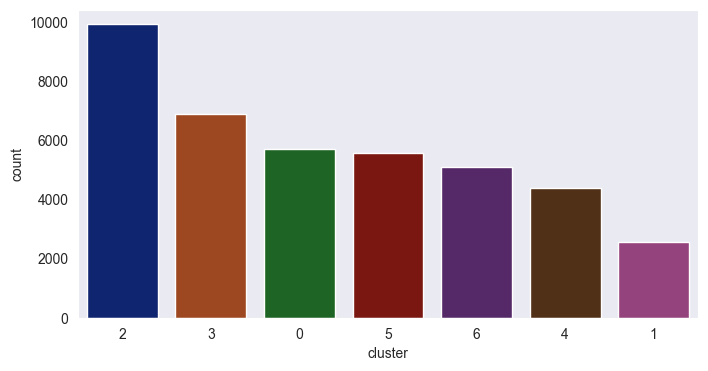

In [ ]:
#intiate a figure 
plt.figure(figsize = (8,4), dpi = 100)
#order 
order = dfx['cluster'].value_counts().index
#count plot
sns.countplot(data = dfx, x = 'cluster', order = order)
#show the figure
plt.show()

In [ ]:
from sklearn.decomposition import PCA

#####  Performing Principal component analysis (PCA). Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space

In [ ]:
pca = PCA(2)
 
#Transform the data
dfp = pca.fit_transform(dff)
 
dfp.shape

(40186, 2)

In [ ]:

#predict the labels of clusters.
labelt = model.fit_predict(dfp)
 
print(labelt)

[3 3 3 ... 2 2 2]


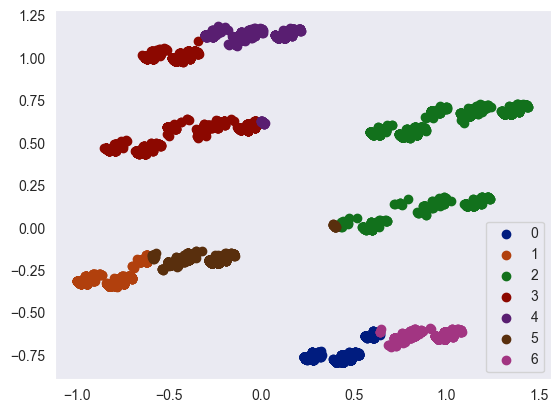

In [ ]:

u_labels = np.unique(labelt)
for i in u_labels:
    plt.scatter(dfp[labelt == i , 0] , dfp[labelt == i , 1] , label = i)
plt.legend()
plt.show()

### Getting the Centroids

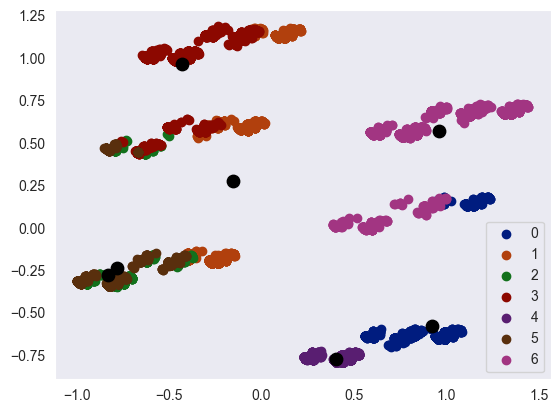

In [ ]:

centroids = model.cluster_centers_
u_labels = np.unique(labelt)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(dfp[labelt == i , 0] , dfp[labelt == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()